# Initialise

In [1]:
# Import SilQ
import silq
silq.initialize('Bayesian')

%matplotlib notebook

Initializing imports
Initializing functions
Initializing instruments
Please read the following warning message:


c:\users\labuser\documents\github\silq\qcodes\qcodes\instrument_drivers\national_instruments\PXIe_4322.py:49: UserWarning: The last known output values are: [0, 0, 0, 0, 0, 0, 0, 0] Please check these values and make sure they correspond to the actual output of the PXIe-4322 module. Any difference between stored value and actual value WILL cause sudden jumps in output.
  'value WILL cause sudden jumps in output.'.format(self.__voltage), UserWarning)


Initializing parameters
Initializing data
Initializing jupyter
Initialization complete


# DC Source GUI

In [3]:
sim_gui(mini=True)

# Tuning

## Set up digitiser

In [4]:
trace_parameter.samples=1
# trace_parameter.pulse_sequence.get_pulse(name='read').duration = 20e-3
trace_parameter.temporary_settings(continuous=True)
trace_parameter.pulse_sequence

PulseSequence with 2 pulses, duration: 0.025
	DCPulse(read, A=0, t_start=0, t_stop=0.02)
	DCPulse(final, A=0, t_start=0.02, t_stop=0.025)

In [5]:
# trace_parameter.pulse_sequence = PulseSequence([DCPulse('read', acquire=True, connection_label='stage')])
trace_parameter.pulse_sequence = EPR_parameter.pulse_sequence
trace_parameter.pulse_sequence

PulseSequence with 4 pulses, duration: 0.095
	DCPulse(empty, A=-0.007, t_start=0, t_stop=0.02)
	DCPulse(plunge, A=0.007, t_start=0.02, t_stop=0.04)
	DCPulse(read_long, A=0, t_start=0.04, t_stop=0.09)
	DCPulse(final, A=0, t_start=0.09, t_stop=0.095)

## Run acquisition

In [6]:
trace_parameter.setup()

<IPython.core.display.Javascript object>


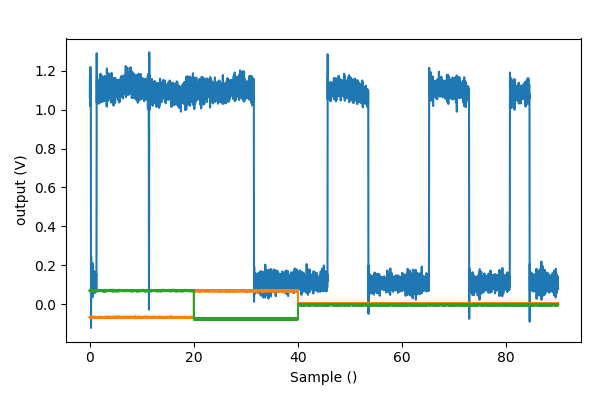

adding plot for output
adding plot for DF
adding plot for TGAC
Wall time: 675 ms


In [7]:
%time plot = TracePlot(trace_parameter, auto_start=True)

# Testing Bayesian Initialisation

In [6]:
layout.pulse_sequence.add(DCPulse('init_done', acquire=True, connection_label='init_done'))
layout.setup()
layout.pulse_sequence

PulseSequence with 3 pulses, duration: 0.000102
	TriggerPulse(init_done[0], t_start=0, duration=0.0001)
	DCPulse(init_done[1], A=1, t_start=0.0001, t_stop=0.000101)
	DCPulse(init_done[2], A=1, t_start=0.000101, t_stop=0.000102)

In [7]:
AWG_interface.pulse_sequence

PulseSequence with 0 pulses, duration: 0

In [6]:
layout.acquisition()

TypeError: 'NoneType' object is not iterable

# Continuous EPR Sequence

In [5]:
EPR_continuous_parameter.t_skip = 0.0
EPR_continuous_parameter.t_read = 50
pulse_sequence = PulseSequence()
pulse_sequence.add(
            DCPulse('empty', acquire=True, connection_label='stage'),
            DCPulse('plunge', acquire=False, connection_label='stage'),
            DCPulse('read_long', acquire=True, connection_label='stage'),
            DCPulse('final', acquire=False, connection_label='stage'))
EPR_continuous_parameter.pulse_sequence = pulse_sequence

EPR_continuous_parameter.pulse_sequence['plunge'].duration = 1e-3
EPR_continuous_parameter.pulse_sequence['read_long'].duration = 30e-3
EPR_continuous_parameter.pulse_sequence['empty'].duration = 1e-3
EPR_continuous_parameter.pulse_sequence['plunge'].amplitude = 100e-3
EPR_continuous_parameter.pulse_sequence['empty'].amplitude = -100e-3
EPR_continuous_parameter.pulse_sequence['final'].amplitude = 0

EPR_continuous_parameter.pulse_sequence

PulseSequence with 4 pulses, duration: 0.037
	DCPulse(empty, A=-0.1, t_start=0, t_stop=0.001)
	DCPulse(plunge, A=0.1, t_start=0.001, t_stop=0.002)
	DCPulse(read_long, A=0, t_start=0.002, t_stop=0.032)
	DCPulse(final, A=0, t_start=0.032, t_stop=0.037)

In [6]:
# Calculate gate values depending on current positions
y_sweep,x_sweep = create_set_vals(2, step_percentage=1, points=100)

EPR_continuous_parameter.samples=250
EPR_continuous_parameter.temporary_settings(continuous=True)
EPR_continuous_parameter.setup(start=True)

# Live DC Scan

## Setup

In [14]:
DC_sweep_parameter.pulse_duration = .1
DC_sweep_parameter.trace_pulse.duration = 20
DC_sweep_parameter.final_delay = 0

DC_sweep_parameter.trace_pulse.enabled = False
DC_sweep_parameter.trace_pulse.connection_label = 'TGAC'

DC_sweep_parameter.sweep_parameters.clear()
xrange = 0.04
yrange = 0.04
DC_sweep_parameter.add_sweep('DF', np.linspace(-xrange, xrange, 15), 
                             connection_label='DF',
                             offset_parameter=DF)
DC_sweep_parameter.add_sweep('TGAC', np.linspace(-yrange, yrange, 15), 
                             connection_label='TGAC',
                            offset_parameter=TGAC)


print(f'pulses: {len(DC_sweep_parameter.pulse_sequence)}')

pulses: 255


In [15]:
DC_sweep_parameter.temporary_settings(continuous=True)
DC_sweep_parameter.setup()

## Scan

In [16]:
DC_sweep_parameter.setup(start=True)

<IPython.core.display.Javascript object>


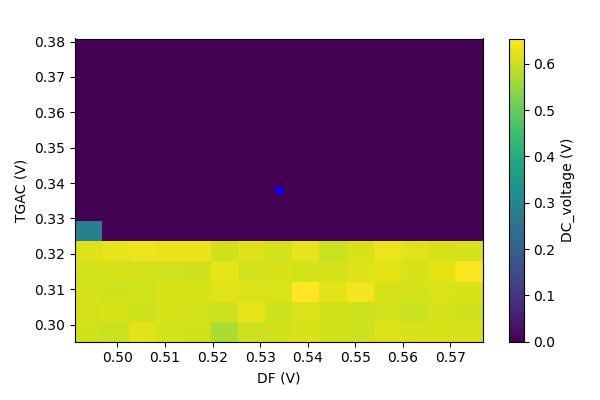

Wall time: 14.1 s


In [17]:
%time plot = DCSweepPlot(DC_sweep_parameter, auto_start=True)

# 2D Scan

In [18]:
d_DF   = 150e-3
d_TGAC = 150e-3
x_vals = DF.sweep(DF()-d_DF, DF()+d_DF,  step=0.010)
y_vals = TGAC.sweep(TGAC()-d_TGAC, TGAC()+d_TGAC, step=0.010)
print(f'Points: X{len(x_vals)} x Y{len(y_vals)}')

Points: X31 x Y31


In [ ]:
DC_parameter = parameters.DCParameter()
DC_parameter.setup()
loop = Loop(y_vals).loop(
    x_vals).each(
        DC_parameter)
data = loop.get_data_set(name=f'2D_DC_{x_vals.name}_{y_vals.name}')
plot = loop[0].plot(data.DC_voltage)
loop.run()

layout.stop()
x_vals.parameter(x_vals[0])
y_vals.parameter(y_vals[0])

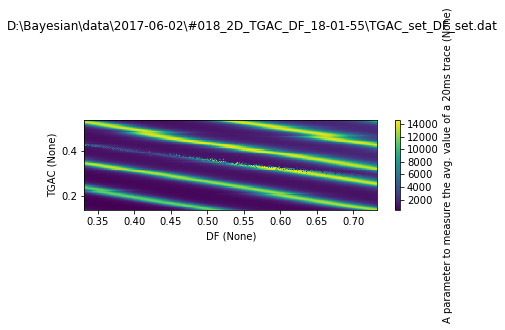

In [13]:
data = qc.load_data(r'D:\Bayesian\data\2017-06-02\#018_2D_TGAC_DF_18-01-55\TGAC_set_DF_set.dat')
qc.MatPlot(data.M3300A_DIG_acquisition_param)

# EPR

## Run EPR Sequence and analyse

In [4]:
EPR_parameter.t_skip = 0.0
EPR_parameter.t_read = 50 # 50 ms
# EPR_parameter.pulse_sequence['plunge'].duration = 5e-3
# EPR_parameter.pulse_sequence['read_long'].duration = 50e-3
# EPR_parameter.pulse_sequence['empty'].duration = 5e-3
# EPR_parameter.pulse_sequence['plunge'].amplitude = 20e-3
# EPR_parameter.pulse_sequence['empty'].amplitude = -20e-3
# EPR_parameter.pulse_sequence['final'].t_start = PulseMatch(EPR_parameter.pulse_sequence['read_long'], 't_stop')
EPR_parameter.pulse_sequence['final'].duration = 0.25e-3
EPR_parameter.pulse_sequence

PulseSequence with 4 pulses, duration: 0.05025
	DCPulse(empty, A=-0.03, t_start=0, t_stop=0.01)
	DCPulse(plunge, A=0.03, t_start=0.01, t_stop=0.02)
	DCPulse(read_long, A=0, t_start=0.02, t_stop=0.05)
	DCPulse(final, A=0, t_start=0.05, t_stop=0.05025)

<IPython.core.display.Javascript object>


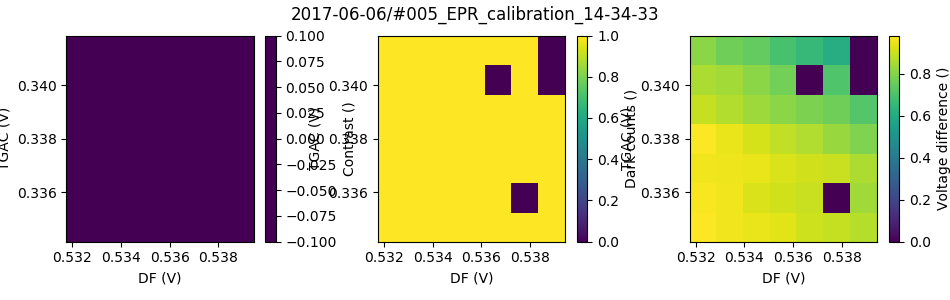

DataSet:
   data = load_data('2017-06-06/#005_EPR_calibration_14-34-33')
   <Type>   | <array_id>         | <array.name>       | <array.shape>
   Setpoint | TGAC_set           | TGAC               | (7,)
   Setpoint | DF_set             | DF                 | (7, 7)
   Measured | contrast           | contrast           | (7, 7)
   Measured | dark_counts        | dark_counts        | (7, 7)
   Measured | voltage_difference | voltage_difference | (7, 7)
   Measured | fidelity_empty     | fidelity_empty     | (7, 7)
   Measured | fidelity_load      | fidelity_load      | (7, 7)
Started at 2017-06-06 14:34:33
Finished at 2017-06-06 14:35:00


In [4]:
# Calculate gate values depending on current positions
y_sweep,x_sweep = create_set_vals(2, step_percentage=10, points=7)

EPR_parameter.samples=1
EPR_parameter.temporary_settings(continuous=True)
EPR_parameter.setup()
loop = Loop(
    y_sweep).loop(
        x_sweep).each(
            EPR_parameter)

data =  loop.get_data_set(name='EPR_calibration')

loop[0].plot(data.contrast, data.dark_counts, data.voltage_difference, figsize=(9.5, 3))
loop.run();


layout.stop()
EPR_parameter.clear_settings()

## Plot a time trace during an EPR Sequence

In [3]:
EPR_parameter.t_skip = 0.0
EPR_parameter.t_read = 30 # 50 ms
EPR_parameter.pulse_sequence['empty'].duration      = 10e-3
EPR_parameter.pulse_sequence['plunge'].duration     = 10e-3
EPR_parameter.pulse_sequence['read_long'].duration  = 30e-3
EPR_parameter.pulse_sequence['plunge'].amplitude    = 30e-3
EPR_parameter.pulse_sequence['empty'].amplitude     = -30e-3
EPR_parameter.pulse_sequence['final'].t_start       = PulseMatch(EPR_parameter.pulse_sequence['read_long'], 't_stop')
EPR_parameter.pulse_sequence['final'].duration      = 0.25e-3
EPR_parameter.pulse_sequence

PulseSequence with 4 pulses, duration: 0.05025
	DCPulse(empty, A=-0.03, t_start=0, t_stop=0.01)
	DCPulse(plunge, A=0.03, t_start=0.01, t_stop=0.02)
	DCPulse(read_long, A=0, t_start=0.02, t_stop=0.05)
	DCPulse(final, A=0, t_start=0.05, t_stop=0.05025)

In [ ]:
%time plot = TracePlot(EPR_parameter, auto_start=True)

In [5]:
%debug

> c:\users\labuser\documents\github\silq\qcodes\qcodes\plots\qcmatplotlib.py(59)__getitem__()
     57 
     58     def __getitem__(self, key):
---> 59         return self.subplots[key]
     60 
     61     def _init_plot(self, subplots=None, figsize=None, num=None):

ipdb> self
ipdb> k
*** NameError: name 'k' is not defined
ipdb> u
> c:\users\labuser\documents\github\silq\silq\tools\plot_tools.py(371)update_plot()
    369                                      [self.y_gate.get_latest()], 'ob', ms=5)
    370                 else:
--> 371                     self[k].add(result, x=setpoints[0],
    372                                 xlabel=setpoint_names[0],
    373                                 ylabel=name,

ipdb> k
1
ipdb> x
*** NameError: name 'x' is not defined
ipdb> setpoints
(array([  0.000e+00,   1.000e-03,   2.000e-03, ...,   5.000e+01,
         5.000e+01,   5.000e+01]),)
ipdb> setpoints[0]
array([  0.000e+00,   1.000e-03,   2.000e-03, ...,   5.000e+01,
         5.000e+01,   5.00

<IPython.core.display.Javascript object>


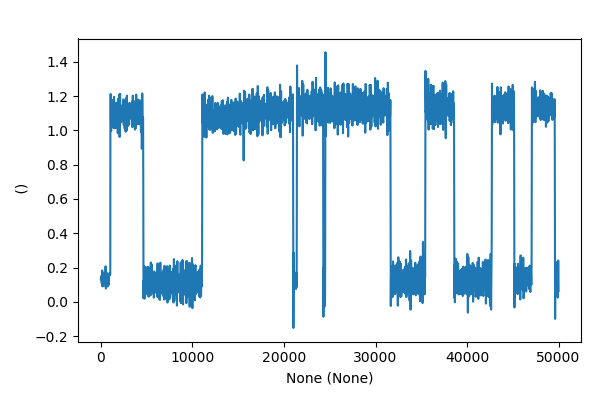

In [5]:
EPR_parameter()
trace = [EPR_parameter.data['empty']['output'][0], EPR_parameter.data['plunge']['output'][0], EPR_parameter.data['read_long']['output'][0]]
trace = np.concatenate(trace,axis = 0)
qc.MatPlot(trace)

False


<IPython.core.display.Javascript object>


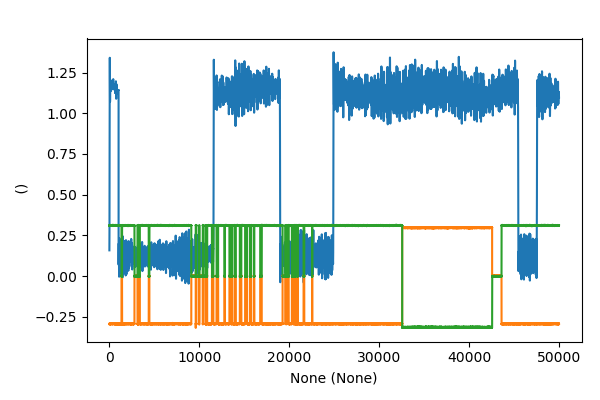

In [4]:
# layout.stop()
EPR_parameter.clear_settings()
print(EPR_parameter.continuous)

# loop = Loop(dummy_parameter[0:10:1]).each(EPR_parameter)
# data = loop.get_data_set(name='EPR_continuous')
plot = qc.MatPlot()
for _ in range(1000):
    EPR_parameter()
    trace = [EPR_parameter.data['empty']['output'][0], EPR_parameter.data['plunge']['output'][0], EPR_parameter.data['read_long']['output'][0]]
    trace = np.concatenate(trace, axis = 0)
    trace_df = [EPR_parameter.data['empty']['DF'][0], EPR_parameter.data['plunge']['DF'][0], EPR_parameter.data['read_long']['DF'][0]]
    trace_df = np.concatenate(trace_df, axis = 0)
    trace_tgac = [EPR_parameter.data['empty']['TGAC'][0], EPR_parameter.data['plunge']['TGAC'][0], EPR_parameter.data['read_long']['TGAC'][0]]
    trace_tgac = np.concatenate(trace_tgac, axis = 0)
    
    plot.clear()
    plot.add(trace)
    plot.add(trace_df)
    plot.add(trace_tgac)
    plot.update_plot()
# loop.plot()
# loop.run()

# Variable Read Scan

In [2]:
read_pulse = variable_read_parameter.pulse_sequence['read']
read_voltage = parameters.AttributeParameter(read_pulse, attribute='amplitude')

<IPython.core.display.Javascript object>


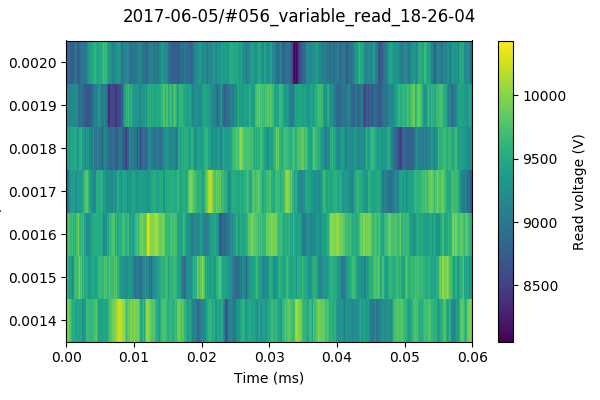

DataSet:
   data = load_data('2017-06-05/#056_variable_read_18-26-04')
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | amplitude_set | amplitude    | (41,)
   Setpoint | time_set      | time         | (41, 60000)
   Measured | read_voltage  | read_voltage | (41, 60000)
Started at 2017-06-05 18:26:04
Finished at 2017-06-05 18:27:52


KeyboardInterrupt: 

In [3]:
variable_read_parameter.setup()
variable_read_parameter.samples=200
loop = Loop(read_voltage.sweep(0.002, -0.002, num=41)).each(
    variable_read_parameter)
data = loop.get_data_set(name=f'variable_read')
plot = loop.plot(data.read_voltage)
loop.run();

In [8]:
DIG_interface.input_pulse_sequence

PulseSequence with 9 pulses, duration: 0.065
	DCPulseImplementation(plunge[0], A=0.06999999999999999, t_start=0, t_stop=0.02
		connection: Connection{AWG.ch1->M3300A_DIG.ch1}())
	DCPulseImplementation(plunge[1], A=-0.07337910791970229, t_start=0, t_stop=0.02
		connection: Connection{AWG.ch2->M3300A_DIG.ch3}())
	TriggerPulseImplementation(trigger, t_start=0, duration=1e-05
		connection: Connection{AWG.ch0->M3300A_DIG.ch4}(, trigger)
		requirements: {'input_instrument': 'M3300A_DIG', 'trigger': True})
	DCPulseImplementation(read[0], A=0.02, t_start=0.02, t_stop=0.04
		connection: Connection{AWG.ch1->M3300A_DIG.ch1}())
	DCPulseImplementation(read[1], A=-0.020965459405629227, t_start=0.02, t_stop=0.04
		connection: Connection{AWG.ch2->M3300A_DIG.ch3}())
	DCPulseImplementation(empty[0], A=-0.06999999999999999, t_start=0.04, t_stop=0.06
		connection: Connection{AWG.ch1->M3300A_DIG.ch1}())
	DCPulseImplementation(empty[1], A=0.07337910791970229, t_start=0.04, t_stop=0.06
		connection: Connecti

In [7]:
DIG_interface.pulse_sequence

PulseSequence with 4 pulses, duration: 0.065
	DCPulse(plunge, A=0.007, t_start=0, t_stop=0.02)
	TriggerPulse(trigger, t_start=0, duration=1e-05
		requirements: {'input_instrument': 'M3300A_DIG', 'trigger': True})
	DCPulse(read, A=0.002, t_start=0.02, t_stop=0.04)
	DCPulse(empty, A=-0.007, t_start=0.04, t_stop=0.06)

In [ ]:
%debug

> c:\users\labuser\documents\github\silq\silq\parameters\acquisition_parameters.py(859)get()
    857         self.acquire()
    858 
--> 859         self.results = np.concatenate([self.data['plunge']['output'],
    860                                        self.data['read']['output'],
    861                                        self.data['empty']['output']])

ipdb> self.data
{'plunge[0]': {'trigger': array([ 10943.33 ,  10962.945,  10957.47 , ...,   3598.915,   3212.535,
         3323.655]), 'init_done': array([-4.76 , -4.76 , -6.78 , ..., -5.005, -6.74 , -5.615]), 'output': array([ 8973.275,  8975.155,  8974.805, ...,  9171.98 ,  9173.155,  9173.68 ])}, 'plunge[1]': {'trigger': array([ 10943.33 ,  10962.945,  10957.47 , ...,   3598.915,   3212.535,
         3323.655]), 'init_done': array([-4.76 , -4.76 , -6.78 , ..., -5.005, -6.74 , -5.615]), 'output': array([ 8973.275,  8975.155,  8974.805, ...,  9171.98 ,  9173.155,  9173.68 ])}, 'trigger': {'trigger': array([[ 11099.,  10967., 